# Internet Outage Analysis

In [1]:
%matplotlib notebook
from load_data import load_data
import pandas as pd
import pylab as py

import datetime

In [2]:
(downstream, upstream), events, speedtest = load_data('./data/')

<IPython.core.display.Javascript object>


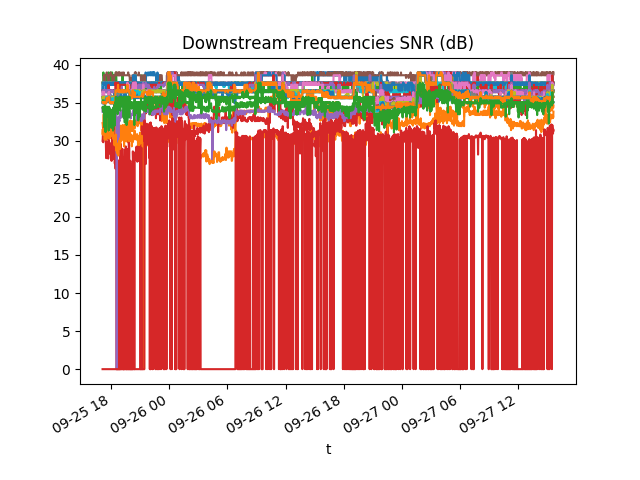

In [3]:
py.figure()
downstream.groupby('DCID')['SNR'].plot(title="Downstream Frequencies SNR (dB)", ax=None);

In [4]:
num_timestamps = len(downstream.groupby('t'))
low_snr_pct = 100.0 * len(downstream.query('SNR < 30').groupby('t')) / num_timestamps
no_snr_pct = 100.0 * len(downstream.query('SNR < 1').groupby('t')) / num_timestamps

print(f"Percent time with low SNR on any frequency: {low_snr_pct:0.2f}%")
print(f"Percent time with no signal on any frequency: {no_snr_pct:0.2f}%")

Percent time with low SNR on any frequency: 56.54%
Percent time with no signal on any frequency: 42.65%


In [5]:
low_snr_dcids = list(downstream.query('SNR < 30').groupby('DCID').groups.keys())
no_snr_dcids = list(downstream.query('SNR < 1').groupby('DCID').groups.keys())

print(f"DCIDs that had low SNR: {low_snr_dcids}")
print(f"DCIDs that had no signal: {no_snr_dcids}")

DCIDs that had low SNR: [2, 4, 5, 12, 24]
DCIDs that had no signal: [4, 5, 12, 24]


<IPython.core.display.Javascript object>


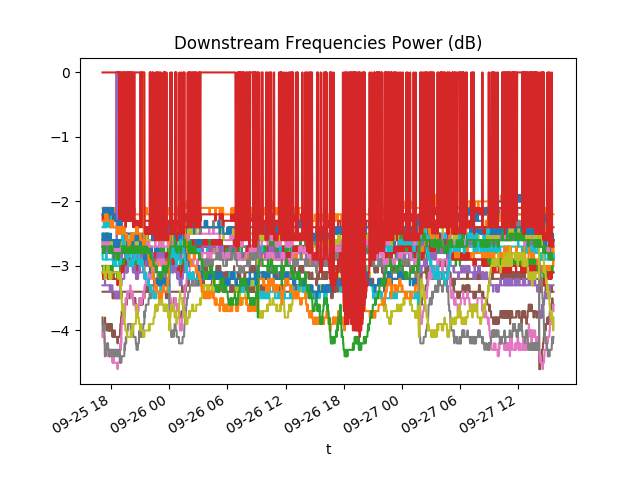

In [6]:
py.figure()
downstream.groupby('DCID')['Power'].plot(title="Downstream Frequencies Power (dB)", ax=None);

<IPython.core.display.Javascript object>


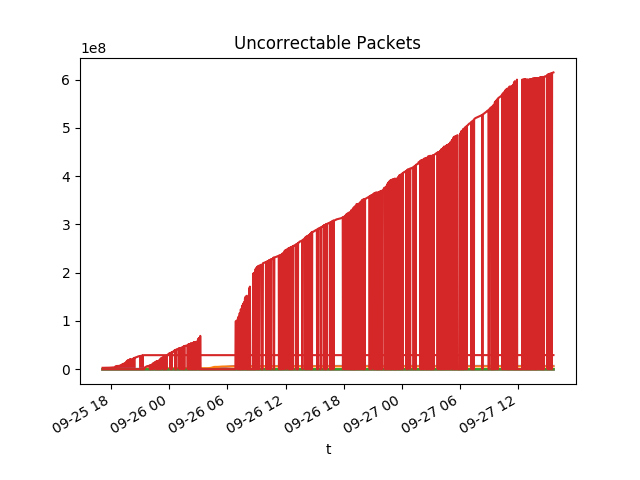

In [7]:
py.figure()
downstream.groupby('DCID')['Uncorrectables'].plot(title="Uncorrectable Packets", ax=None);

<IPython.core.display.Javascript object>


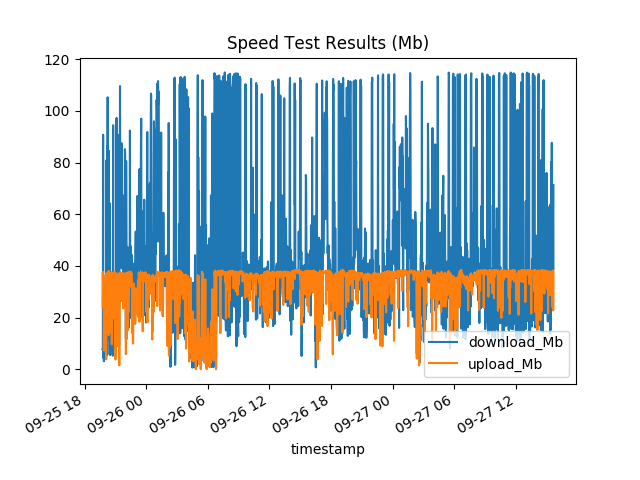

In [8]:
speedtest[['download_Mb', 'upload_Mb']] = speedtest[['download', 'upload']] / 1000000
speedtest[['download_Mb', 'upload_Mb']].plot(legend=True, title="Speed Test Results (Mb)", ax=None)

In [9]:
downup = speedtest[['download_Mb', 'upload_Mb']]
print("Speed Test Stats:\n")
print(f'min:\n{downup.min()}')
print(f'median:\n{downup.median()}')
print(f'mean:\n{downup.mean()}')
print(f'max:\n{downup.max()}')

Speed Test Stats:

min:
download_Mb    0.595861
upload_Mb      0.000000
dtype: float64
median:
download_Mb    36.108979
upload_Mb      36.572120
dtype: float64
mean:
download_Mb    44.076178
upload_Mb      33.281229
dtype: float64
max:
download_Mb    114.876613
upload_Mb       38.498403
dtype: float64


<IPython.core.display.Javascript object>


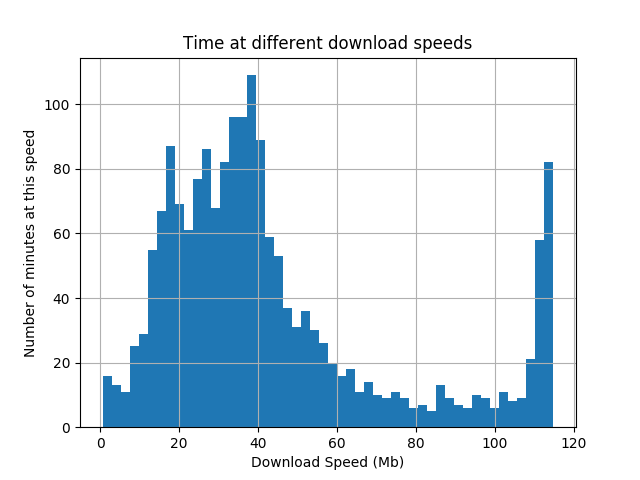

In [10]:
speedtest.hist('download_Mb', bins=50)
py.title('Time at different download speeds')
py.xlabel('Download Speed (Mb)')
py.ylabel('Number of minutes at this speed');

<IPython.core.display.Javascript object>


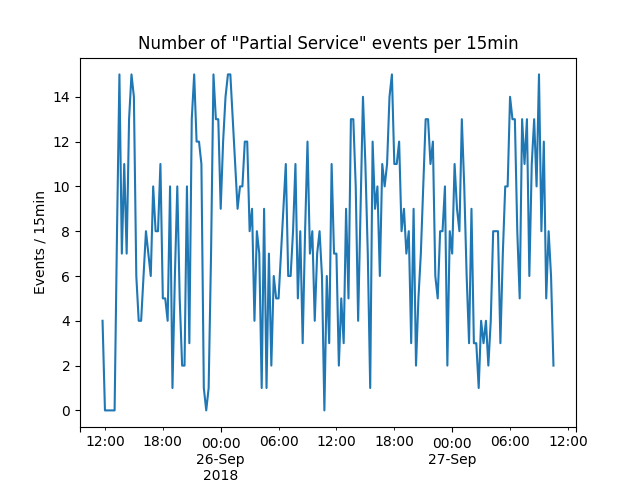

Text(0, 0.5, 'Events / 15min')

In [11]:
py.figure()
events['count'] = 1
events.query('id == 84000700').resample('15T')['count'].sum().plot(title='Number of "Partial Service" events per 15min')
py.ylabel("Events / 15min")

In [12]:
events.query('id == 84000700')  # find all the "Partial Service" modem events

,desc,id,level,count
t,,,,
2018-09-25 11:47:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 11:48:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 11:49:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 11:51:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 13:17:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 13:22:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 13:23:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 13:24:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
2018-09-25 13:25:00,RCS Partial Service;CM-MAC=04:4e:5a:53:77:a0;C...,84000700,5,1
